Sanvicente Perez Angel David

5AV1

Ciencia de datos

1 de oct 2024

En este codigo lo que se hace es explorar un dataset obtenido de kaggle
el cual contiene informacion de automoviles. Para su correcto funcionamiento se debe sustituir la ruta del archivo por la adecuada.

El codigo se divide en 4 secciones generales y estan ordenados lo que quiere decir es que para su correcto funcionaiento se debe ejecutar las celdas en orden

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Análisis exploratorio de datos (EDA, Exploratory Data Analysis)

## Datos generales

In [ ]:
#cargar el conjunto de datos y obtener el total de datos y columnas que contiene
df=pd.read_csv('/content/used_cars_data.csv')
df.shape

(7253, 14)

In [ ]:
df.head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [ ]:
tipo=['numerico','categorico','categorico','numerico','numerico','categorico','categorico','categorico','numerico','numerico','numerico','numerico','numerico','numerico']
descripcion=['numero de series',
             'modelo del carro',
             'ubicacion del carro',
             'año de produccion del carro',
             'kilometros recorridos',
             'tipo de combustible que utiliza',
             'tipo de transmision que utiliza',
             'tipo de propietario',
             'rendimiento del combustible',
             'tamaño del motor',
             'caballos de fuerza',
             'numero de asientos que contiene',
             'precio del carro nuevo',
             'precio que se pide por el carro'
             ]

In [ ]:
#creacion de un dataset con la informacion de las coumnas

info=pd.DataFrame({
    'columna':df.columns,
    'tipo de datos':df.dtypes,
    'tipo':tipo,
    'descripcion':descripcion
})
info

,columna,tipo de datos,tipo,descripcion
S.No.,S.No.,int64,numerico,numero de series
Name,Name,object,categorico,modelo del carro
Location,Location,object,categorico,ubicacion del carro
Year,Year,int64,numerico,año de produccion del carro
Kilometers_Driven,Kilometers_Driven,int64,numerico,kilometros recorridos
Fuel_Type,Fuel_Type,object,categorico,tipo de combustible que utiliza
Transmission,Transmission,object,categorico,tipo de transmision que utiliza
Owner_Type,Owner_Type,object,categorico,tipo de propietario
Mileage,Mileage,object,numerico,rendimiento del combustible
Engine,Engine,object,numerico,tamaño del motor


## Análisis numérico

In [ ]:
#encontrar los valores estadisticos
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:
#cantidad de valores nulos y porcentaje que representa
nulos=pd.DataFrame({
    'columna':df.columns,
    'nulos':df.isnull().sum(),
    'porcentaje':(df.isnull().mean()*100).map(lambda x: f'{x:.2f}%'),
    'duplicados': df.apply(lambda x: x.duplicated().sum())


})
nulos

,columna,nulos,porcentaje,duplicados
S.No.,S.No.,0,0.00%,0
Name,Name,0,0.00%,5212
Location,Location,0,0.00%,7242
Year,Year,0,0.00%,7230
Kilometers_Driven,Kilometers_Driven,0,0.00%,3593
Fuel_Type,Fuel_Type,0,0.00%,7248
Transmission,Transmission,0,0.00%,7251
Owner_Type,Owner_Type,0,0.00%,7249
Mileage,Mileage,2,0.03%,6802
Engine,Engine,46,0.63%,7102


## Analisis Grafico

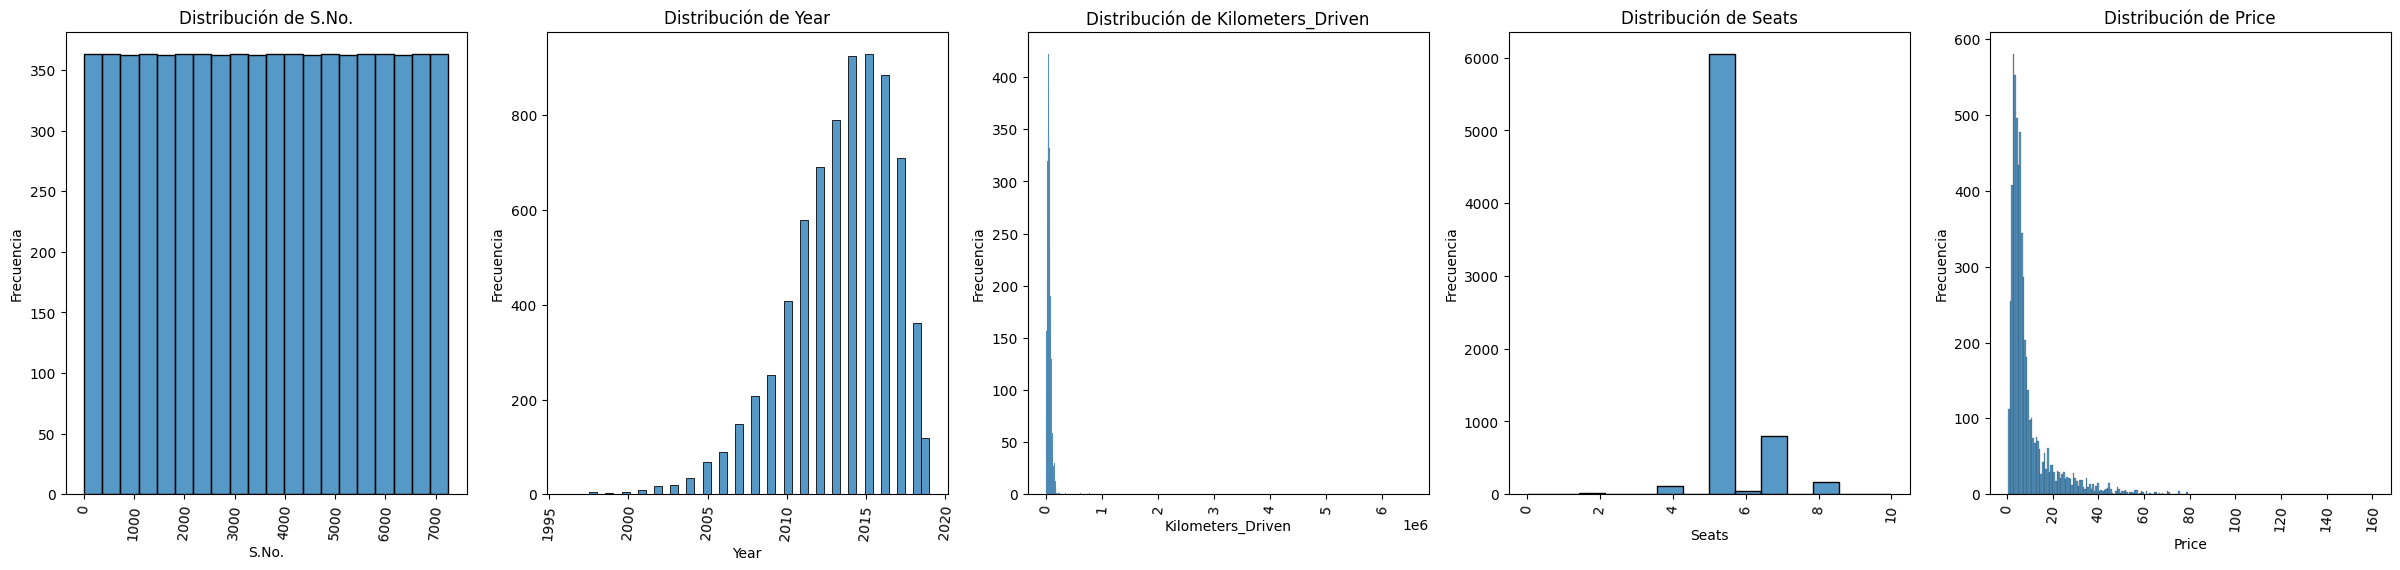

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Graficar la distribución (histograma) de cada columna numérica
# Crear subplots: 1 fila y tantas columnas como variables numéricas
cols = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(1, len(cols), figsize=(30,6))

# Graficar cada variable en su respectivo subplot
for i, col in enumerate(cols):
    sns.histplot(df[col], ax=axes[i])  # kde=True para añadir curva de densidad
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=85)  # Rotar 45 grados (ajusta el ángulo si es necesario)


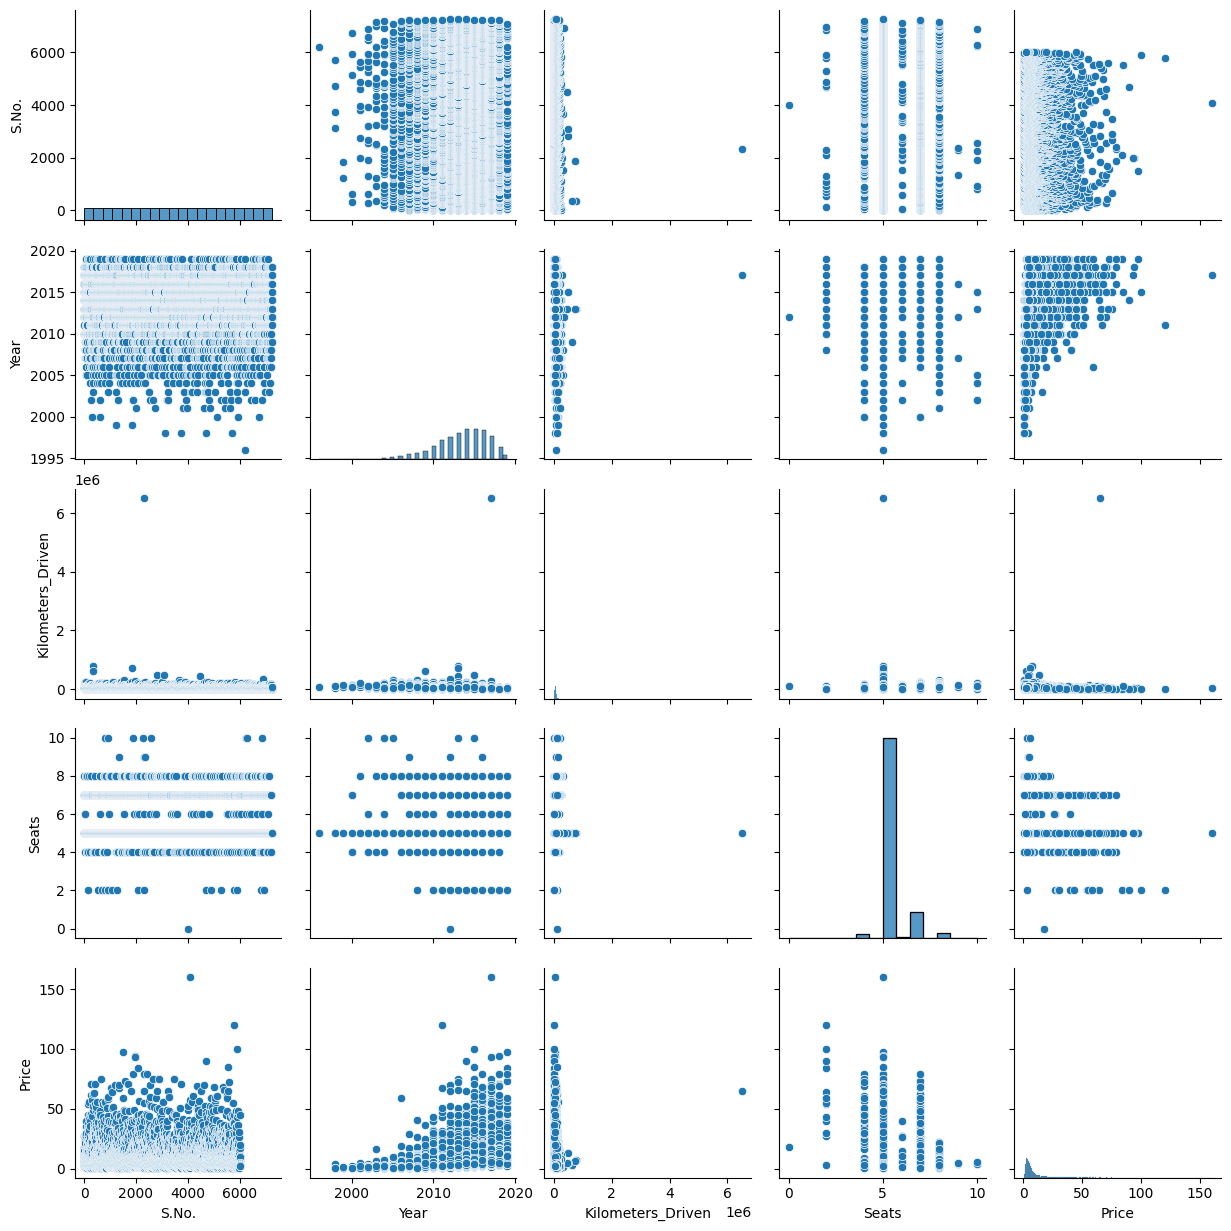

In [ ]:
sns.pairplot(df)
plt.show()

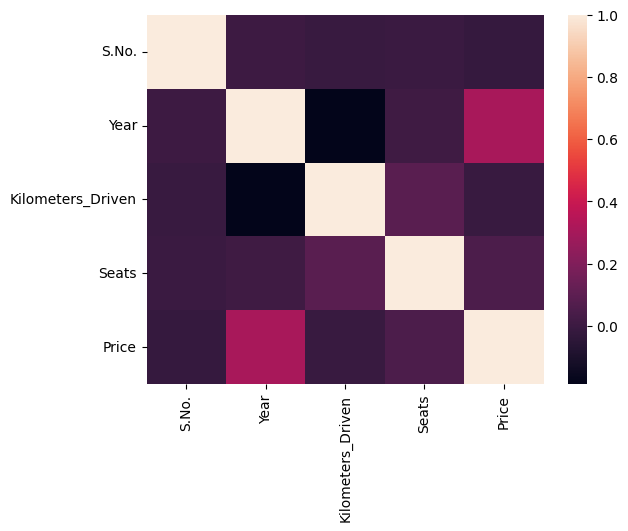

In [ ]:
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr())
plt.show()
#mapa de correlaciones para columnas numericas

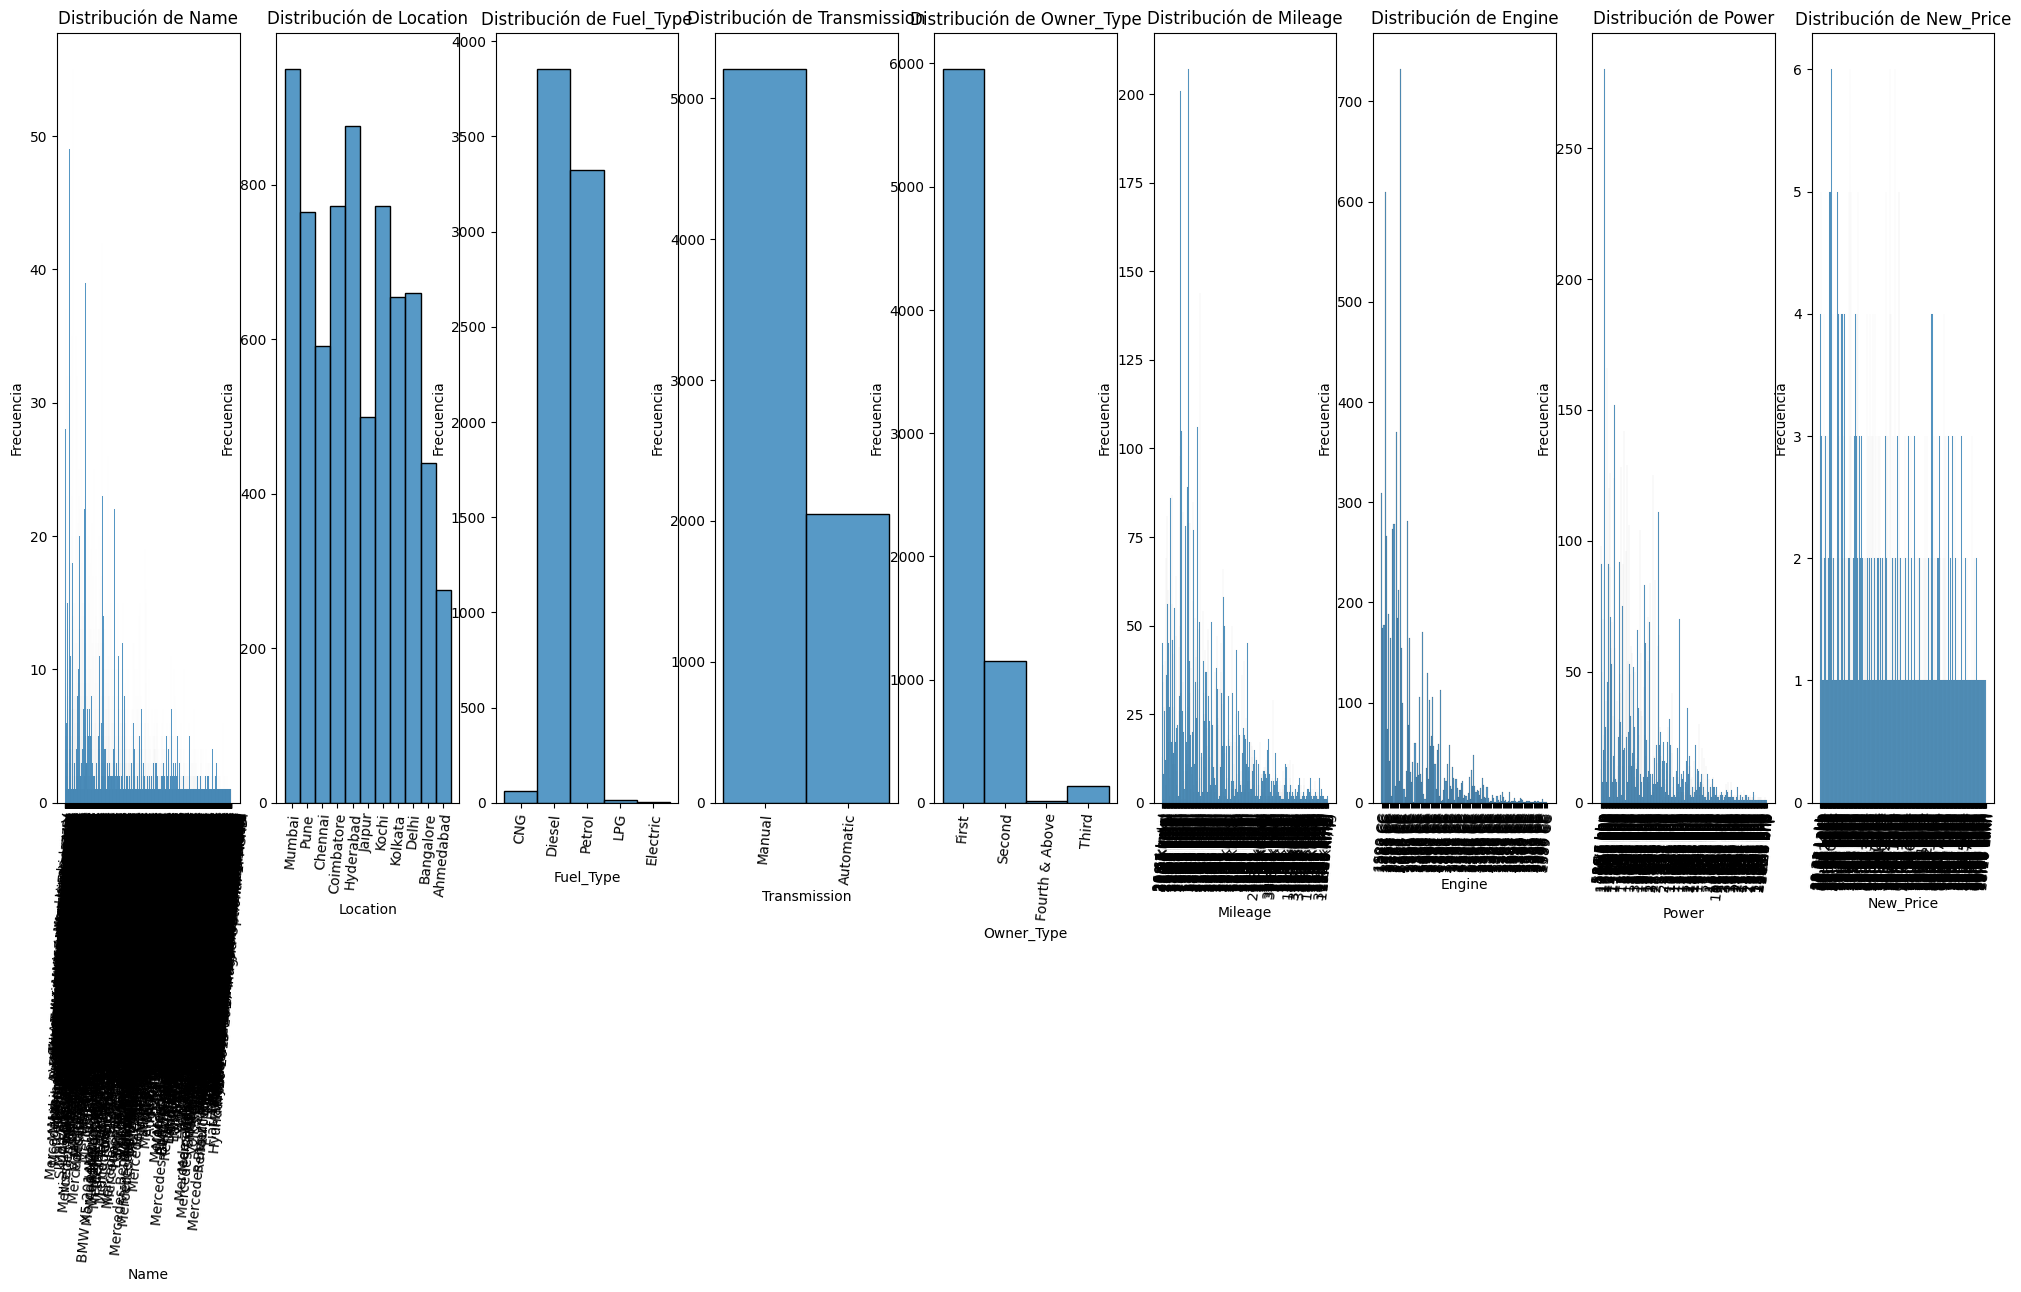

In [ ]:
# Graficar la distribución (histograma) de cada columna categorica
# Crear subplots: 1 fila y tantas columnas como variables numéricas
cols = df.select_dtypes(include=['object']).columns
fig, axes = plt.subplots( 1,len(cols), figsize=(25,10))

# Graficar cada variable en su respectivo subplot
for i, col in enumerate(cols):
    sns.histplot(df[col], ax=axes[i])  # kde=True para añadir curva de densidad
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=85)  # Rotar el ángulo si es necesario)


<ipython-input-36-f97ae2b1c6e0>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


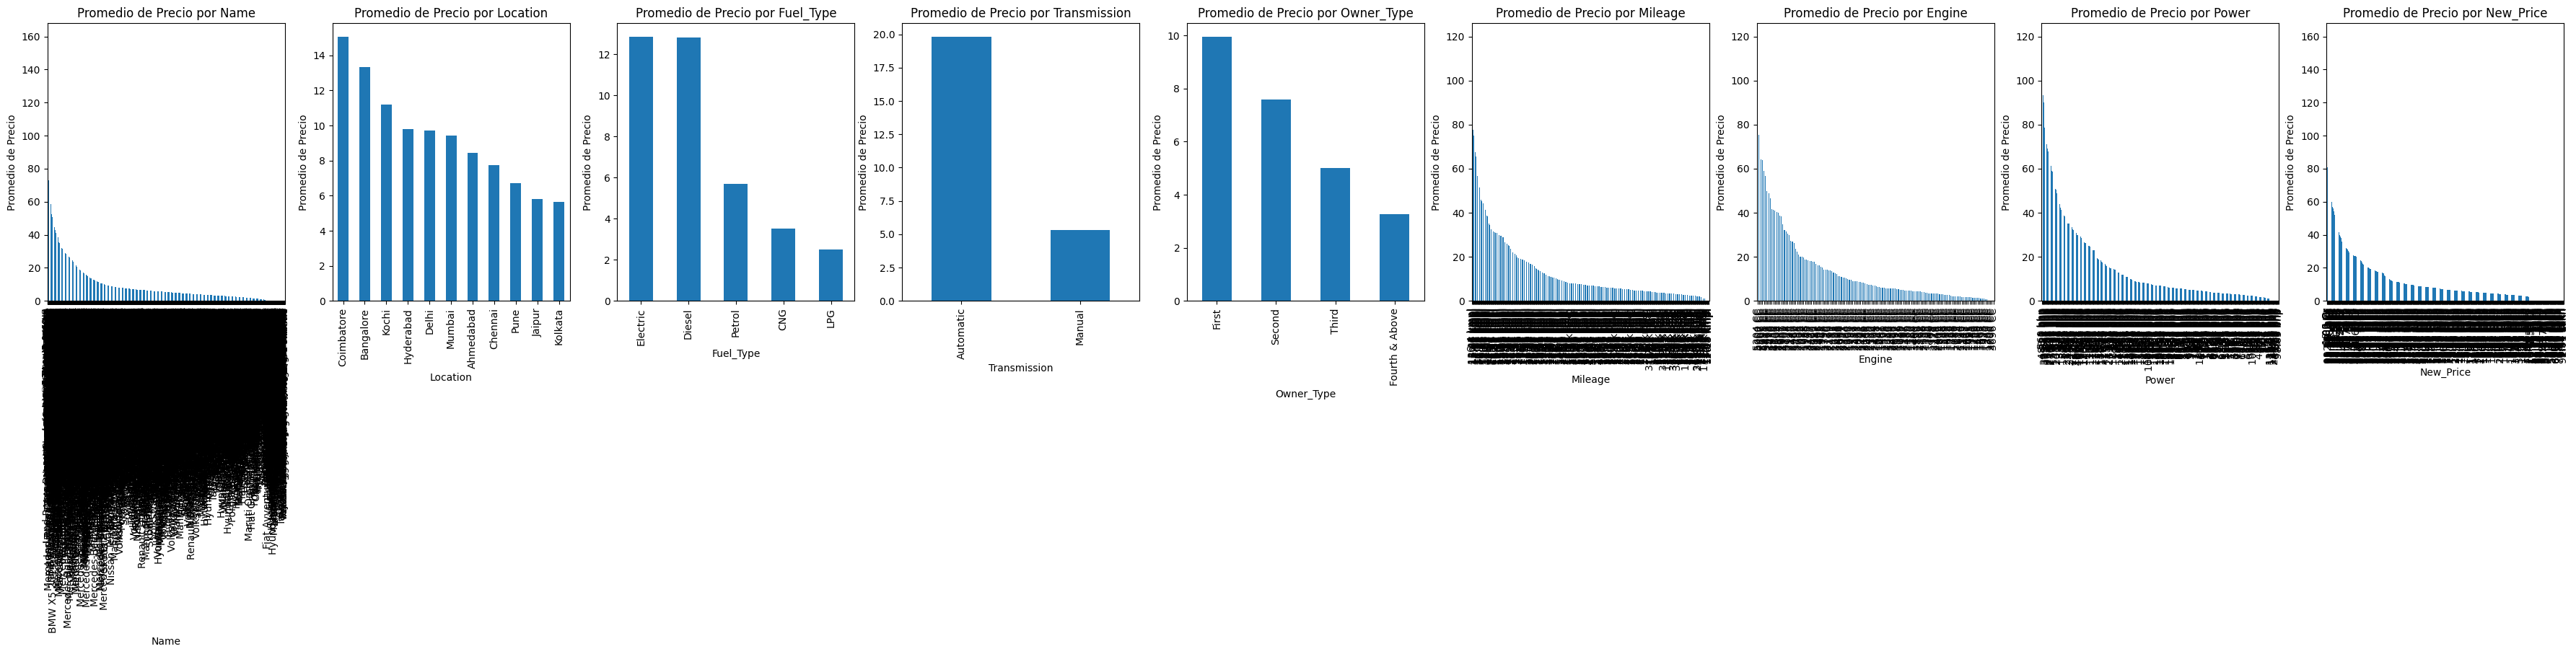

In [ ]:
# Graficar la distribución (histograma) de cada columna categorica
# Crear subplots: 1 fila y tantas columnas como variables numéricas
cols = df.select_dtypes(include=['object']).columns

# Crear subplots con tantas filas como columnas categóricas
fig, axes = plt.subplots(1,len(cols), figsize=(len(cols) * 5,5))

# Graficar cada variable categórica en su respectivo subplot
for i, col in enumerate(cols):
    df.groupby(col)['Price'].mean().sort_values(ascending=False).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Promedio de Precio por {col}')
    axes[i].set_ylabel('Promedio de Precio')
    axes[i].set_xlabel(col)

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()

# Limpieza y transformacion de datos

In [ ]:
#crear un nuevo dataset sin las columnas innecesarias
df_limpio=df.drop(['S.No.','New_Price'],axis=1)

In [ ]:
#renombrar las columnas por su nombre en español
df_limpio.rename(columns={'Name':'Nombre',
                          'Location':'Ubicacion',
                          'Year':'Año',
                          'Kilometers_Driven':'Kilometros_Recorridos',
                          'Fuel_Type':'Combustible',
                          'Transmission':'Transmision',
                          'Owner_Type':'Propietario',
                          'Mileage':'Rendimiento',
                          'Engine':'Motor',
                          'Power':'Potencia',
                          'Seats':'Asientos',
                          'Price':'Precio'
                          },inplace=True)

In [ ]:
#eliminar registros sin informacion de los asientos
df_limpio.dropna(subset=['Asientos'],inplace=True)


In [ ]:
#sustituir nombres de la columna nombre
df_limpio['Nombre'] = df_limpio['Nombre'].str.replace('ISUZU', 'Isuzu')
df_limpio['Nombre'] = df_limpio['Nombre'].str.replace('Mini', 'MiniCooper')
df_limpio['Nombre'] = df_limpio['Nombre'].str.replace('Land', 'LandRover')


In [ ]:
#quitar los sufijos de las columnas que son strings
df_limpio['Motor'] = df_limpio['Motor'].str.replace('CC', '')

df_limpio['Potencia'] = df_limpio['Potencia'].str.replace('bhp', '')
df_limpio['Potencia'] = df_limpio['Potencia'].replace('null ', np.nan)

df_limpio['Rendimiento'] = df_limpio['Rendimiento'].str.replace('kmpl', '')
df_limpio['Rendimiento'] = df_limpio['Rendimiento'].str.replace('km/kg', '')

#cambiar el tipo de dato de string a float

df_limpio['Potencia'] = df_limpio['Potencia'].astype(float)
df_limpio['Rendimiento']  =df_limpio['Rendimiento'] .astype(float)
df_limpio['Motor']= df_limpio['Motor'].astype(float)


In [ ]:
#rellenar valores nulos en la columna Milage con el promedio
df_limpio['Rendimiento']=df_limpio['Rendimiento'].fillna(df_limpio['Rendimiento'].mean())
#rellenar valores nulos en la columna Motor con el primer vaor de la moda en caso de que sea más de un valor
df_limpio['Motor']=df_limpio['Motor'].fillna(df_limpio['Motor'].mode()[0])


In [ ]:
#redondear valores de la columna potencia, rendimiento y motor
df_limpio['Potencia'] = df_limpio['Potencia'].round().astype('Int64')
df_limpio['Rendimiento']  =df_limpio['Rendimiento'].round().astype('Int64')
df_limpio['Motor']= df_limpio['Motor'].round().astype('Int64')

In [ ]:
#multiplicar por mil el valor precio
df_limpio['Precio']=df_limpio['Precio']*1000

In [ ]:
#calcular el logaritmo de la columna precio y kilometros recorridos
df_limpio['Precio']=np.log10(df_limpio['Precio'])
df_limpio['Kilometros_Recorridos']=np.log10(df_limpio['Kilometros_Recorridos'])

# Ingenieria de caracteristicas

In [ ]:
#crear nuevas columnas antiguedad y marca
df_limpio['Antiguedad']=2024-df_limpio['Año']
                                                          #'' indica en que caracter se separara la cadena de texto
                                                          #n=1 indica la cantidad de particiones a realizar
df_limpio[['Marca','Modelo']]=df_limpio['Nombre'].str.split(' ',n=1,expand=True)

In [ ]:
df_limpio['Modelo']=df_limpio['Nombre'].str.replace(' ', '')
df_limpio.drop('Nombre',axis=1,inplace=True)

In [ ]:
df_limpio

,Nombre,Ubicacion,Año,Kilometros_Recorridos,Combustible,Transmision,Propietario,Rendimiento,Motor,Potencia,Asientos,Precio,Antiguedad,Marca,Modelo
0,Maruti Wagon R LXI CNG,Mumbai,2010,4.857332,CNG,Manual,First,27,998,58,5.0,3.243038,14,Maruti,MarutiWagonRLXICNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,4.612784,Diesel,Manual,First,20,1582,126,5.0,4.096910,9,Hyundai,HyundaiCreta1.6CRDiSXOption
2,Honda Jazz V,Chennai,2011,4.662758,Petrol,Manual,First,18,1199,89,5.0,3.653213,13,Honda,HondaJazzV
3,Maruti Ertiga VDI,Chennai,2012,4.939519,Diesel,Manual,First,21,1248,89,7.0,3.778151,12,Maruti,MarutiErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,4.609274,Diesel,Automatic,Second,15,1968,141,5.0,4.248954,11,Audi,AudiA4New2.0TDIMultitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,4.951391,Diesel,Manual,First,21,1598,104,5.0,NaN,13,Volkswagen,VolkswagenVentoDieselTrendline
7249,Volkswagen Polo GT TSI,Mumbai,2015,4.770852,Petrol,Automatic,First,17,1197,104,5.0,NaN,9,Volkswagen,VolkswagenPoloGTTSI
7250,Nissan Micra Diesel XV,Kolkata,2012,4.447158,Diesel,Manual,First,23,1461,63,5.0,NaN,12,Nissan,NissanMicraDieselXV
7251,Volkswagen Polo GT TSI,Pune,2013,4.718186,Petrol,Automatic,Third,17,1197,104,5.0,NaN,11,Volkswagen,VolkswagenPoloGTTSI


# Análisis exploratorio de datos posterior a etapas de limpieza, transformación, e ingeniería de características

In [ ]:
#valores estadisticos
df_limpio.describe()

,Año,Kilometros_Recorridos,Rendimiento,Motor,Potencia,Asientos,Precio,Antiguedad
count,7200.000000,7200.000000,7200.0,7200.0,7075.0,7200.000000,5977.000000,7200.000000
mean,2013.391111,4.672651,18.194583,1616.710972,112.775124,5.279722,3.794247,10.608889
std,3.235118,0.311494,4.487522,595.234346,53.492729,0.811660,0.378893,3.235118
min,1996.000000,2.232996,0.0,72.0,34.0,0.000000,2.643453,5.000000
25%,2011.000000,4.531479,15.0,1198.0,75.0,5.000000,3.544068,8.000000
50%,2014.000000,4.726124,18.0,1493.0,94.0,5.000000,3.752048,10.000000
75%,2016.000000,4.863323,21.0,1968.0,138.0,5.000000,3.998259,13.000000
max,2019.000000,6.812913,34.0,5998.0,616.0,10.000000,5.204120,28.000000


In [ ]:
#valores nulos y duplicados
nulos=pd.DataFrame({
    'columna':df_limpio.columns,
    'nulos':df_limpio.isnull().sum(),
    'porcentaje':(df_limpio.isnull().mean()*100).map(lambda x: f'{x:.2f}%'),
    'duplicados': df_limpio.apply(lambda x: x.duplicated().sum())


})
nulos

,columna,nulos,porcentaje,duplicados
Nombre,Nombre,0,0.00%,5183
Ubicacion,Ubicacion,0,0.00%,7189
Año,Año,0,0.00%,7177
Kilometros_Recorridos,Kilometros_Recorridos,0,0.00%,3557
Combustible,Combustible,0,0.00%,7195
Transmision,Transmision,0,0.00%,7198
Propietario,Propietario,0,0.00%,7196
Rendimiento,Rendimiento,0,0.00%,7173
Motor,Motor,0,0.00%,7050
Potencia,Potencia,125,1.74%,7003


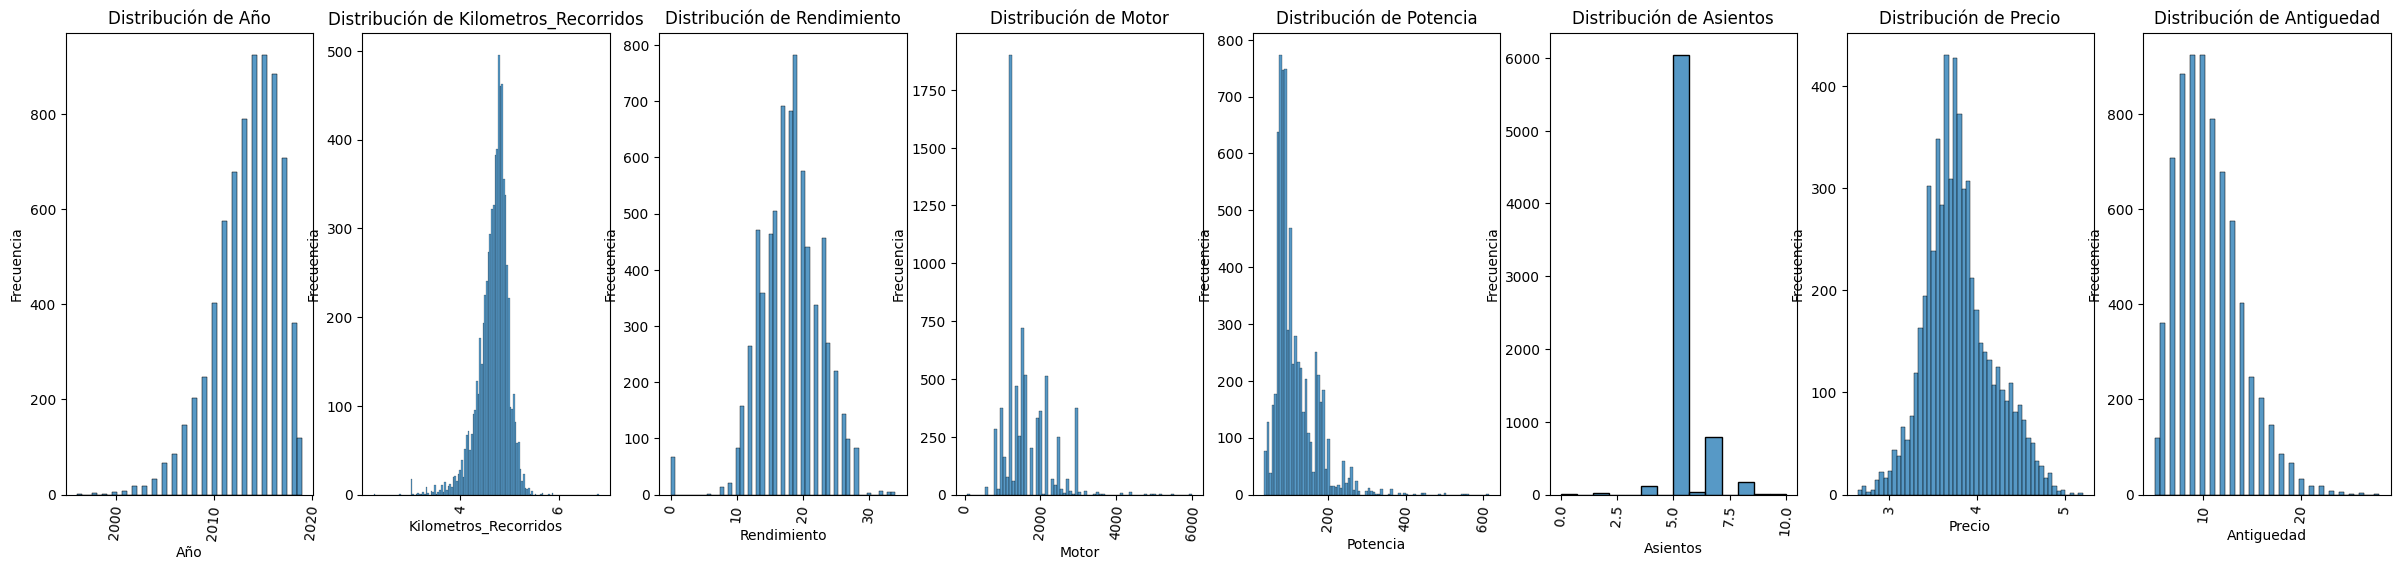

In [ ]:

# Graficar la distribución (histograma) de cada columna numérica
# Crear subplots: 1 fila y tantas columnas como variables numéricas
cols = df_limpio.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(1, len(cols), figsize=(30,6))

# Graficar cada variable en su respectivo subplot
for i, col in enumerate(cols):
    sns.histplot(df_limpio[col], ax=axes[i])  # kde=True para añadir curva de densidad
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=85)  # Rotar 45 grados (ajusta el ángulo si es necesario)


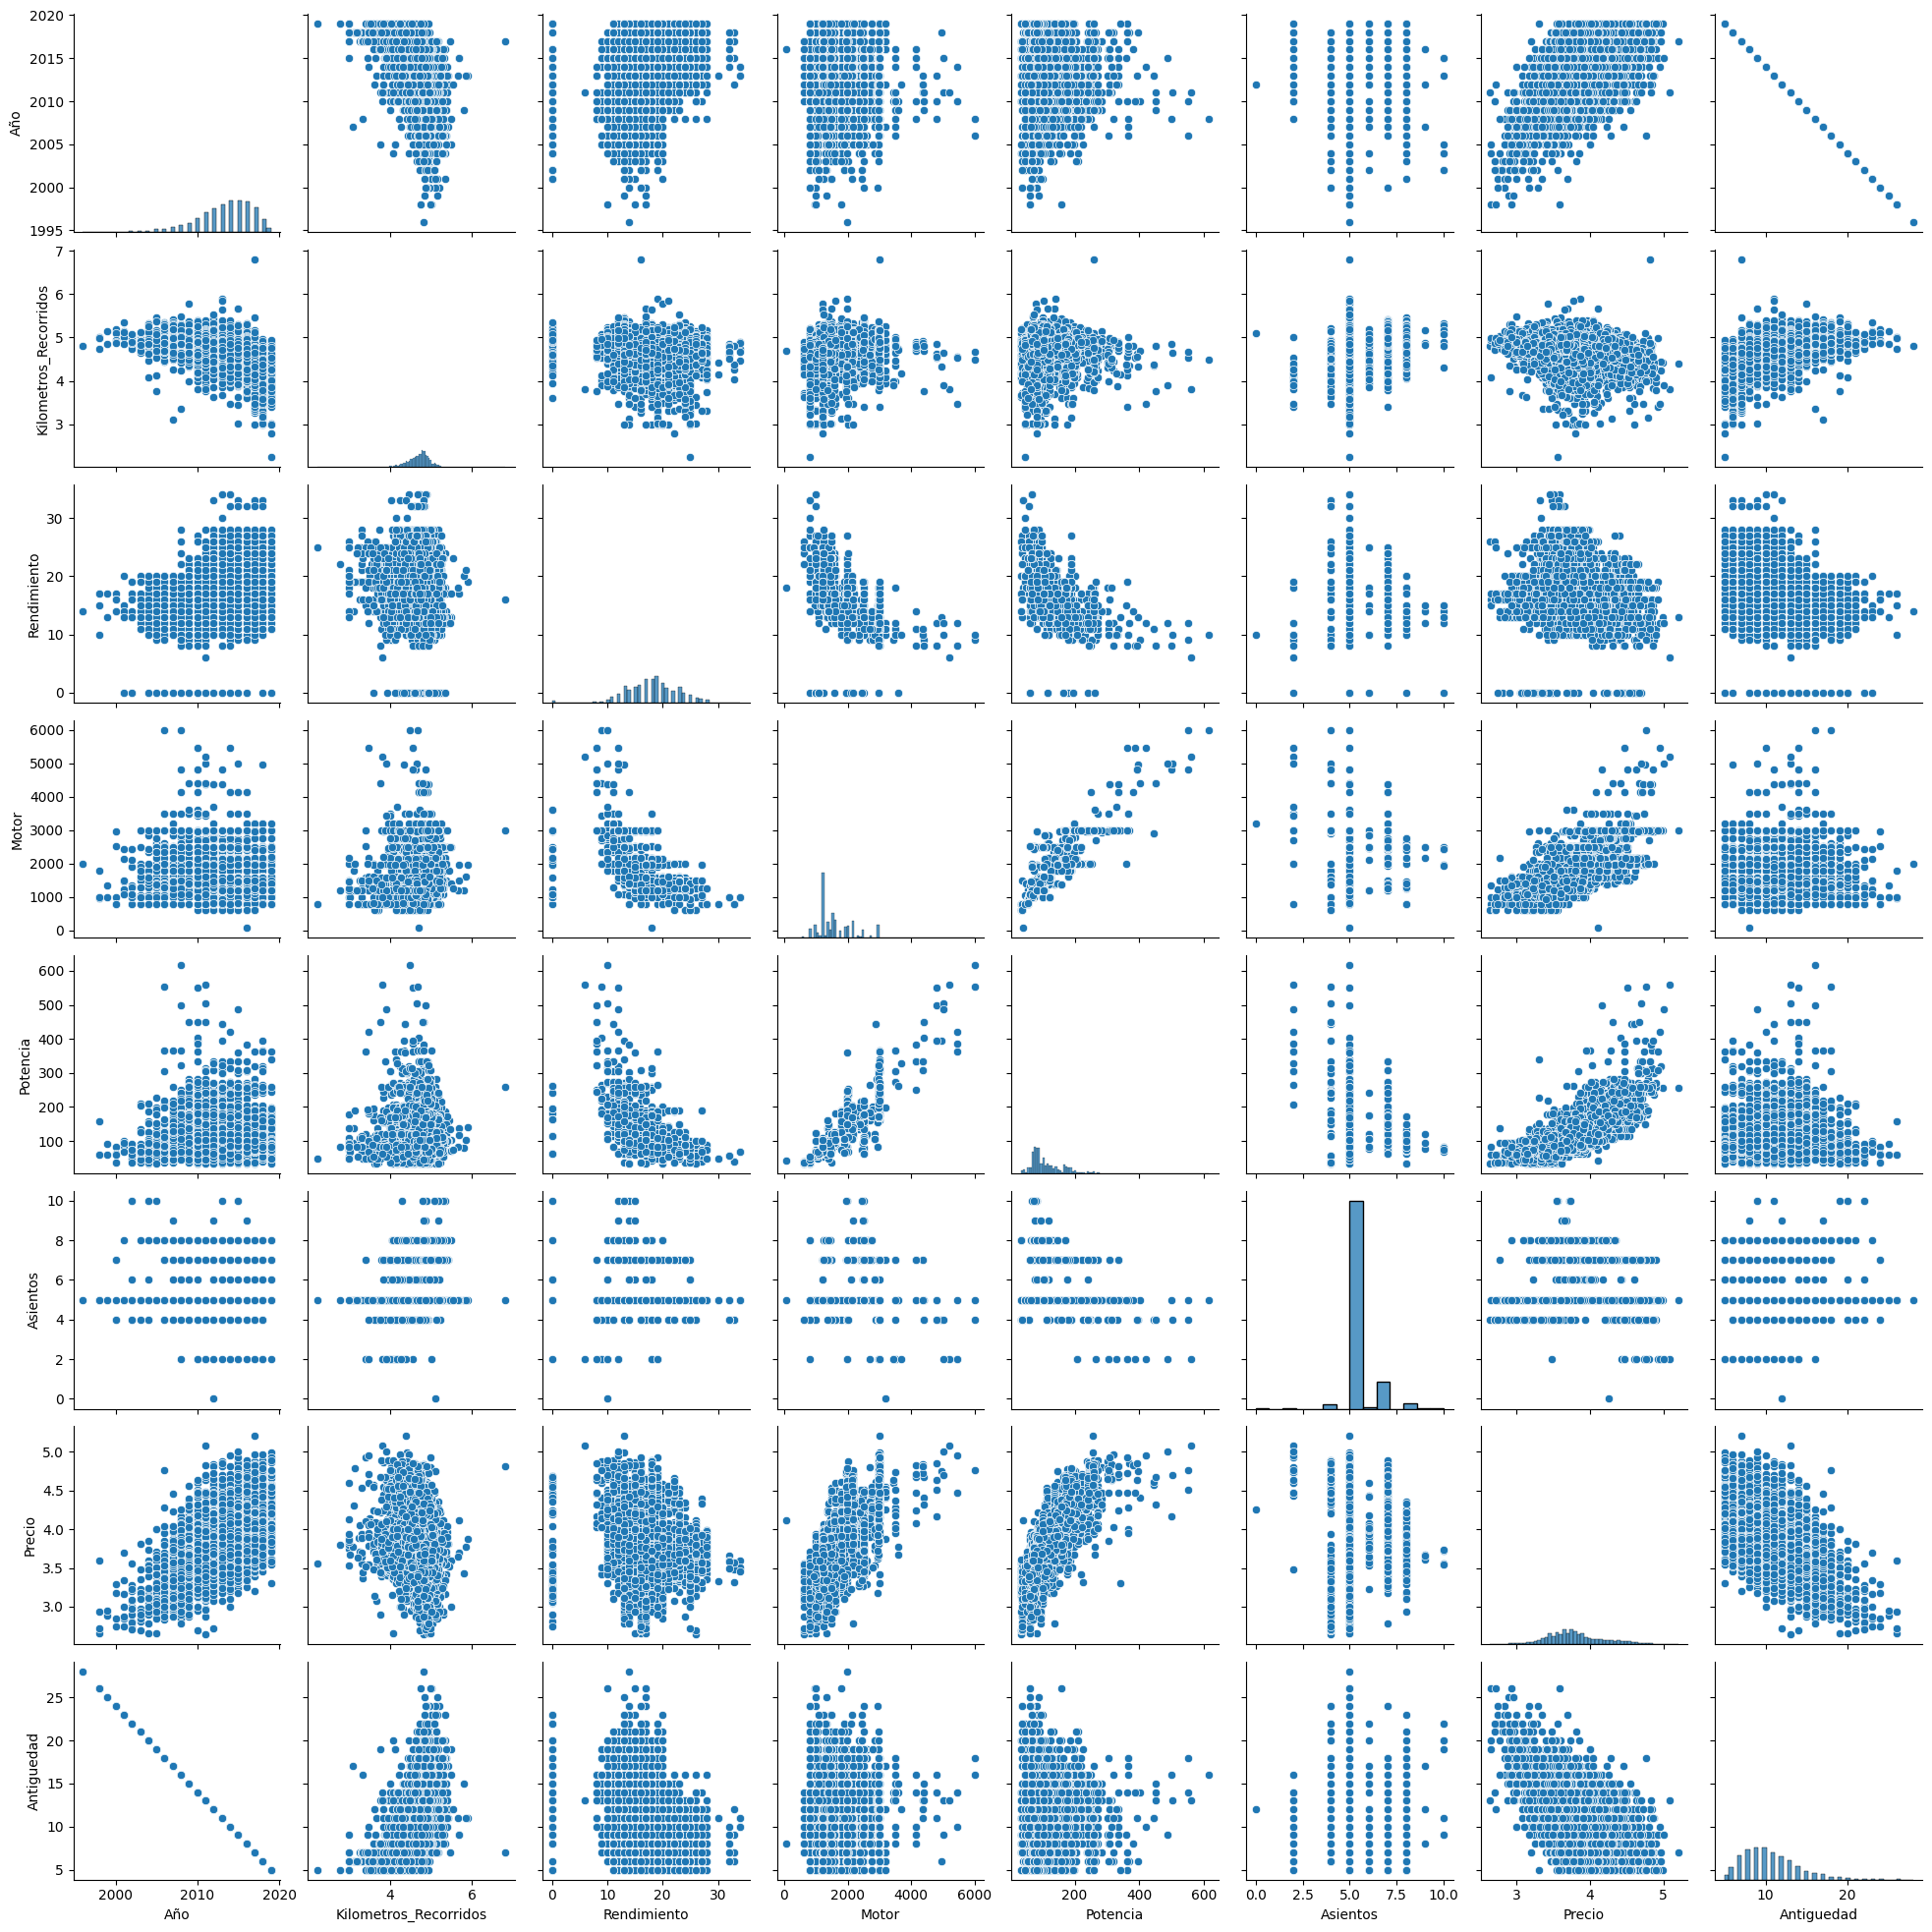

In [ ]:
sns.pairplot(df_limpio)
plt.show()

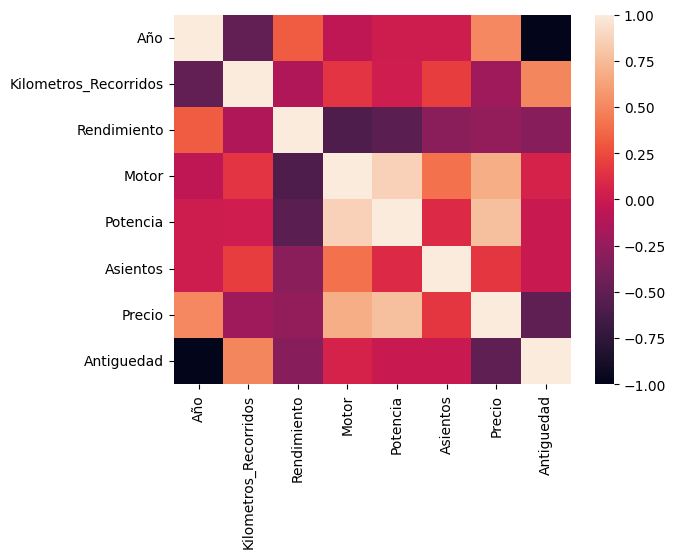

In [ ]:
sns.heatmap(df_limpio.select_dtypes(include=['float64', 'int64']).corr())
plt.show()
#mapa de correlaciones para columnas numericas

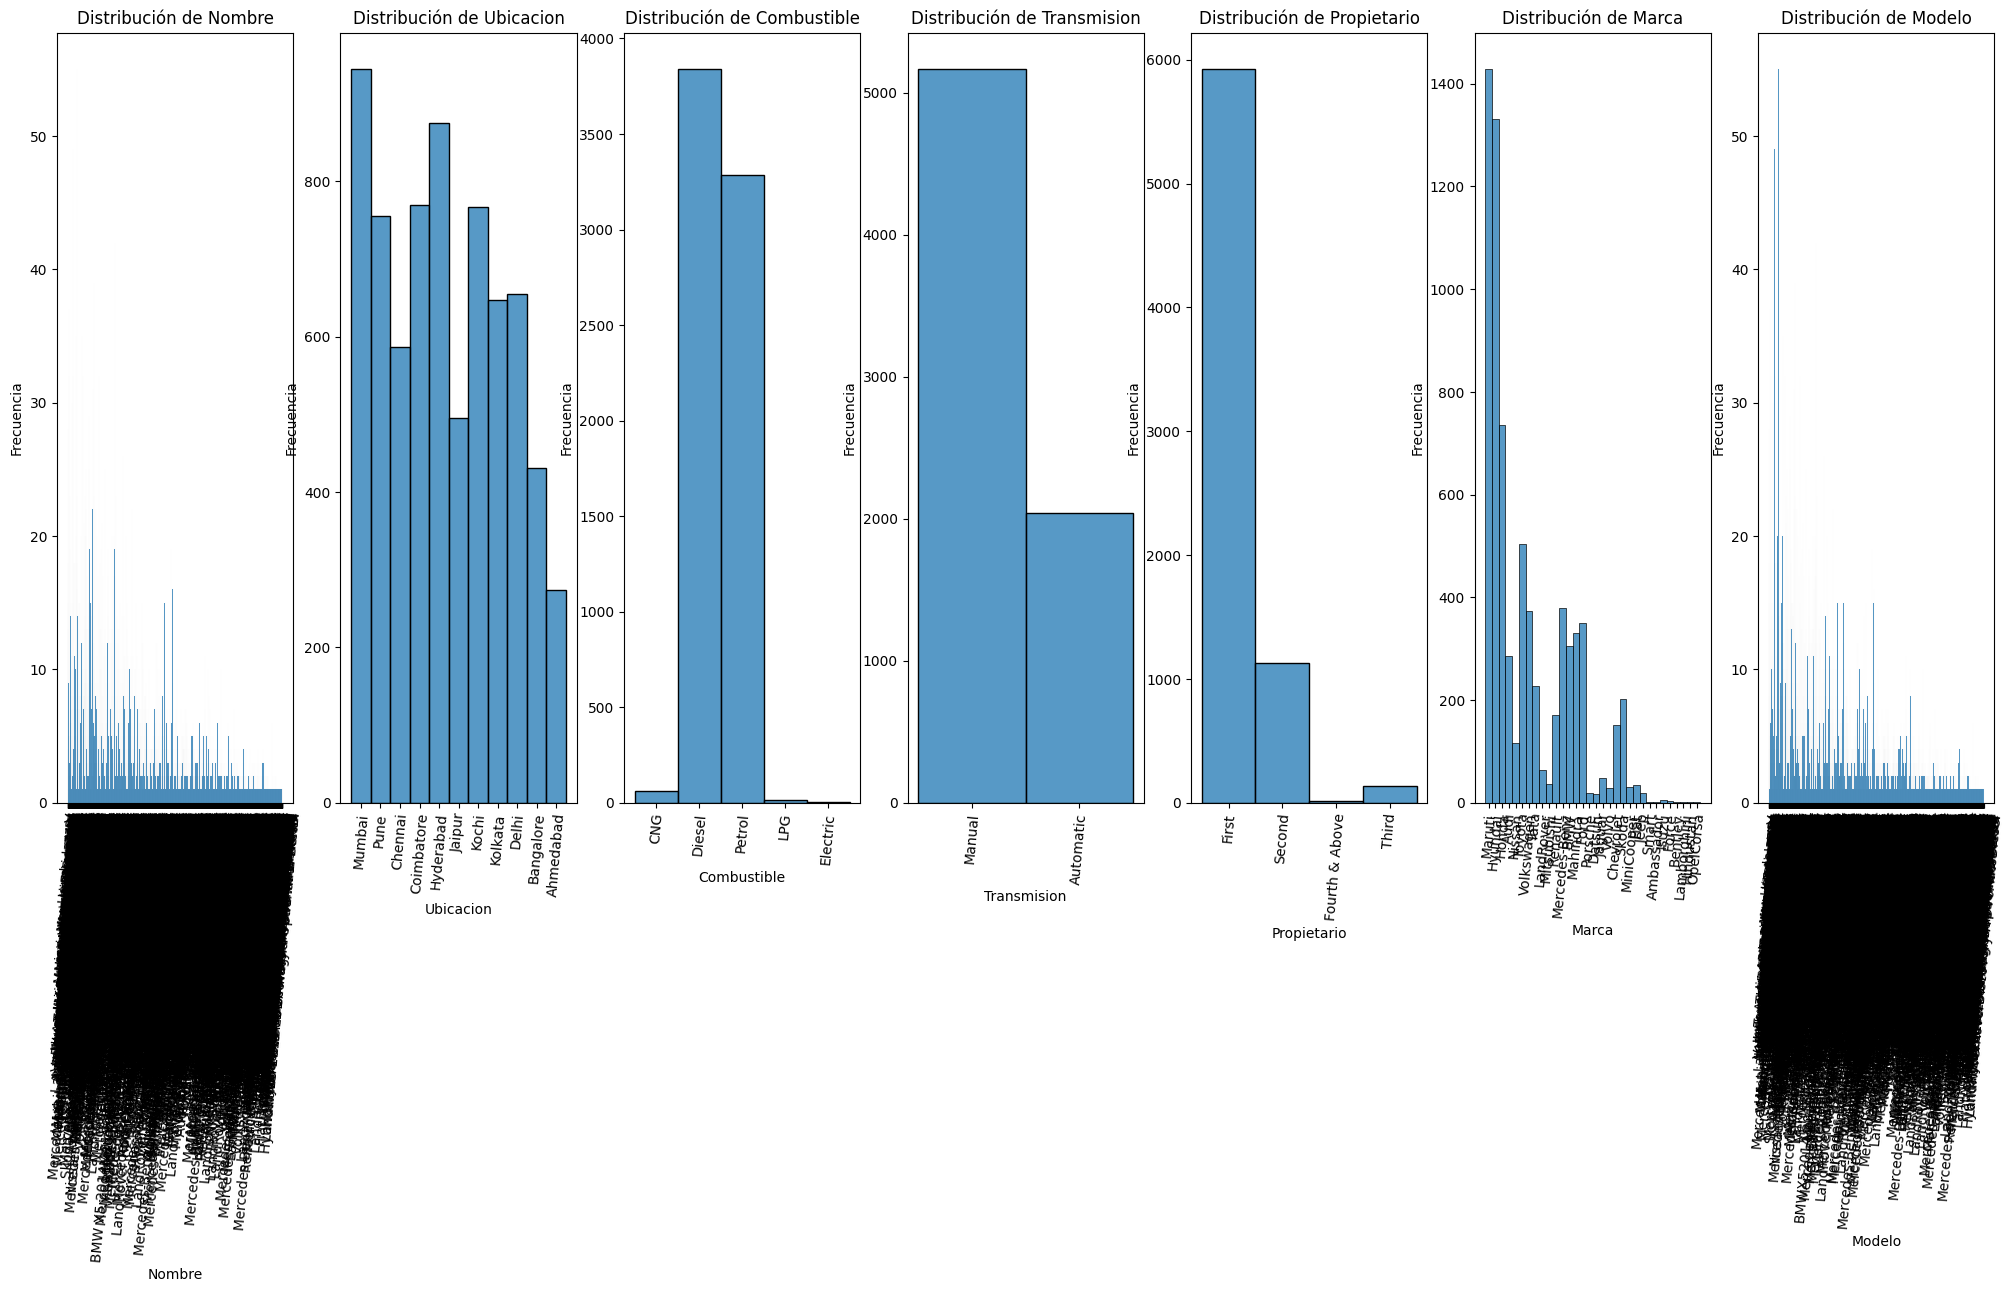

In [ ]:
# Graficar la distribución (histograma) de cada columna categorica
# Crear subplots: 1 fila y tantas columnas como variables numéricas
cols = df_limpio.select_dtypes(include=['object']).columns
fig, axes = plt.subplots( 1,len(cols), figsize=(25,10))

# Graficar cada variable en su respectivo subplot
for i, col in enumerate(cols):
    sns.histplot(df_limpio[col], ax=axes[i])  # kde=True para añadir curva de densidad
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=90)  # Rotar el ángulo si es necesario)

<ipython-input-135-9f0c0f6d0c0b>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


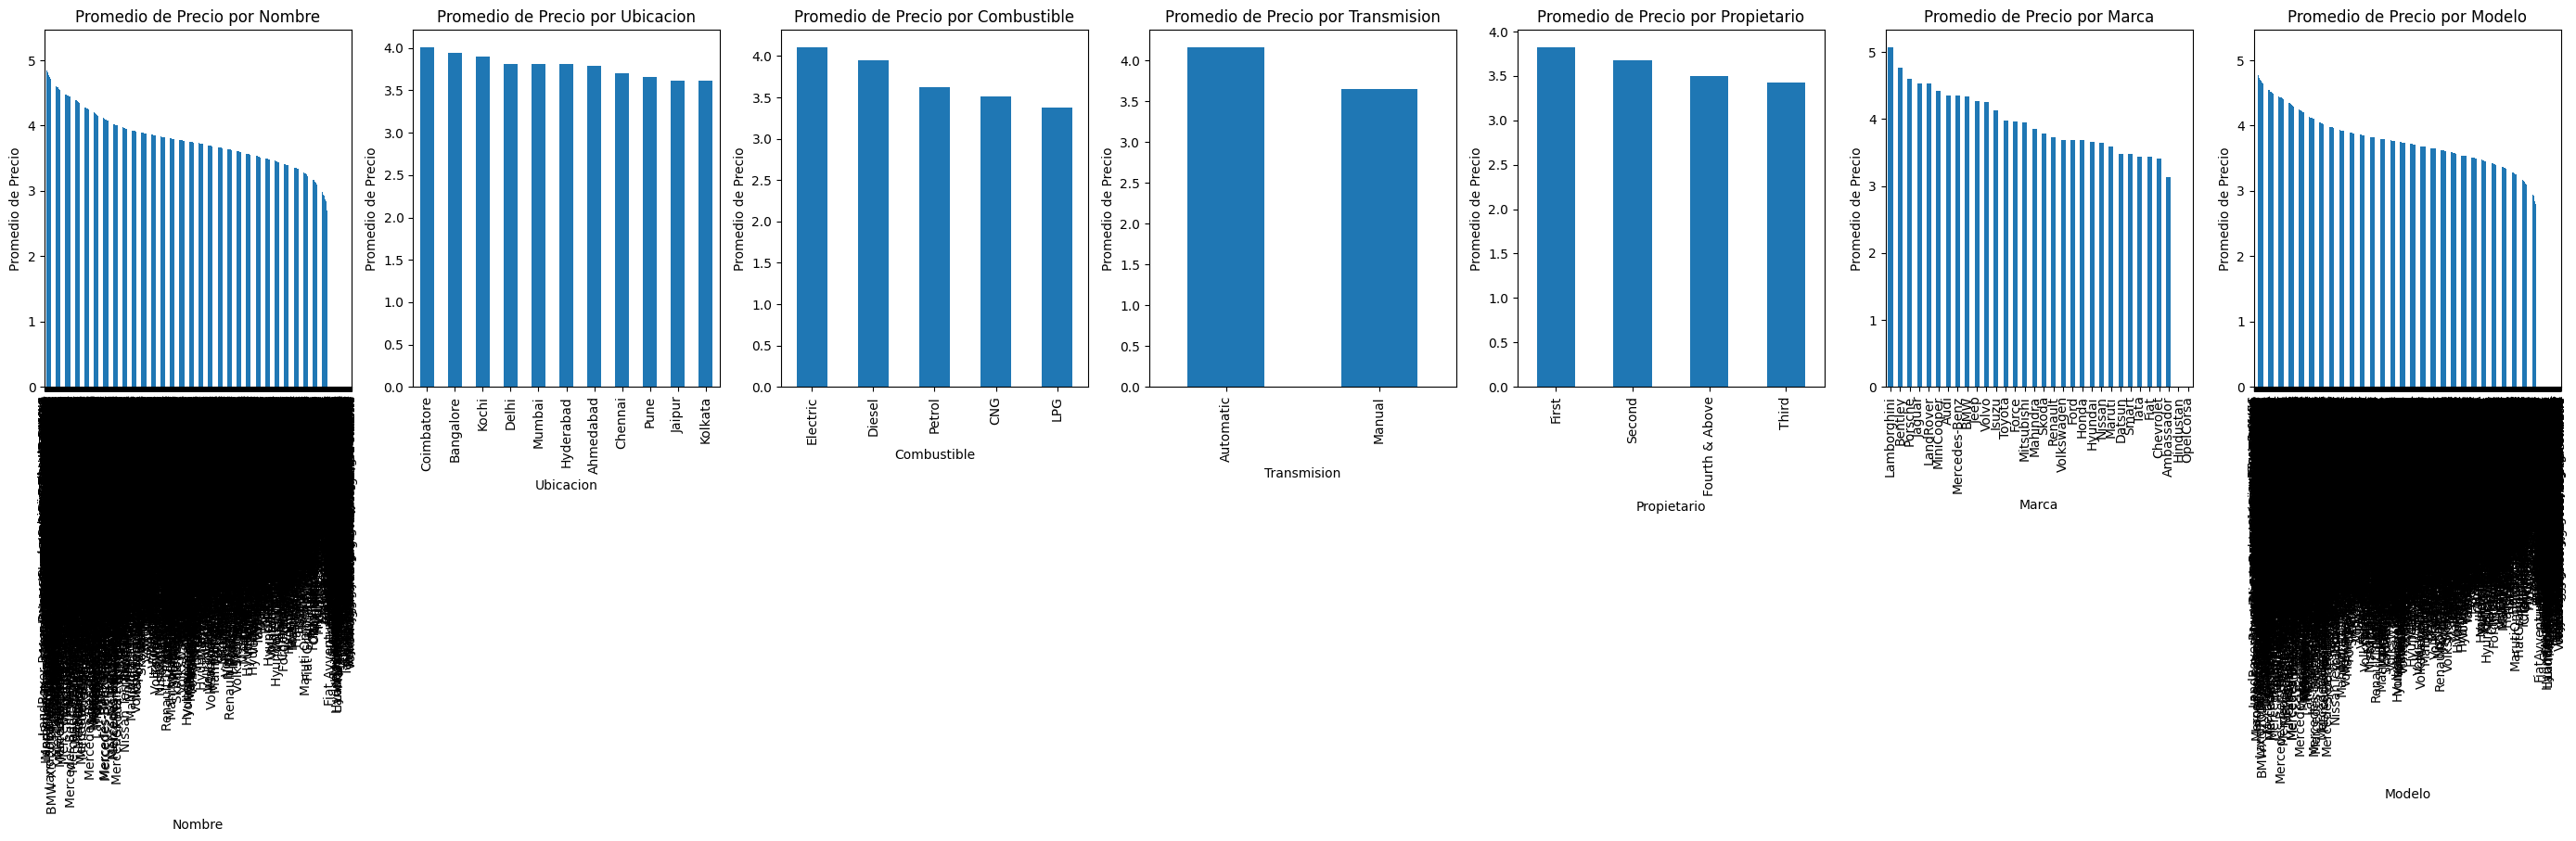

In [ ]:
# Graficar la distribución (histograma) de cada columna categorica
# Crear subplots: 1 fila y tantas columnas como variables numéricas
cols = df_limpio.select_dtypes(include=['object']).columns

# Crear subplots con tantas filas como columnas categóricas
fig, axes = plt.subplots(1,len(cols), figsize=(len(cols) * 5,5))

# Graficar cada variable categórica en su respectivo subplot
for i, col in enumerate(cols):
    df_limpio.groupby(col)['Precio'].mean().sort_values(ascending=False).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Promedio de Precio por {col}')
    axes[i].set_ylabel('Promedio de Precio')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=90)

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()